In [1]:
#import MAnorm2 packages
library(MAnorm2)
library(statmod)
library(scales)
library(RColorBrewer)
library(edgeR)
library(preprocessCore)

#calculate single end p-value
single.end.pvalue<-function(biocond){
    df<-attr(biocond,"df")
    p.value<-pf(biocond$fold.change,df[1],df[2],lower.tail=F)
    return(p.value)
}

MAnorm2 1.2.0 2021-09-10

Loading required package: limma



In [ ]:
path<-'/media/chenhaojie/shao_lab_Disk01/Data_sets/mammalian_preimplantation_embryos/counts/combined_technical_replicates/distal_peak_regions_5000bp.txt'
reads_count<-c(4:14)
occupancy<-c(15:25)


raw_reads_count<-read.table(path,header=T,sep='\t')
raw_reads_count<-raw_reads_count[c(raw_reads_count$chrom!='chrX')&c(raw_reads_count$chrom!='chrY'),]

normalized.data<-MAnorm2::normalize(raw_reads_count,reads_count,occupancy,offset=0.5,
                                    baseline='pseudo-reference')

raw_reads_count<-raw_reads_count[rowMeans(normalized.data[reads_count])>=0,]
normalized.data<-normalized.data[rowMeans(normalized.data[reads_count])>=0,]

biocond<-bioCond(normalized.data[reads_count],
                 normalized.data[occupancy],
                 occupy.num=1,name='Tumor')

biocond$occupancy<-c(biocond$sample.mean<quantile(biocond$sample.mean,0.1))

conds.list<-list(biocond)

method<-'loc'
conds.list.fit<-fitMeanVarCurve(conds.list,method=method,occupy.only=F,args.lp=list(nn=1.0))


conds.list.fit<-estimatePriorDfRobust(conds.list.fit,occupy.only=T)
conds.fit.var<-varTestBioCond(conds.list.fit[[1]])
p.values<-single.end.pvalue(conds.fit.var)

fdrs<-p.adjust(p.values,method='fdr')

fdrs2<-p.adjust(1-p.values,method='fdr')


mads<-apply(normalized.data[reads_count],1,mad)
IQRs<-apply(normalized.data[reads_count],1,IQR)
min.rank<-apply(apply(conds.fit.var[,c('observed.mean','observed.var')],2,rank),1,min)

cpm.matrix<-cpm(raw_reads_count[reads_count],log=TRUE,prior.count=5)
qn.matrix<-normalize.quantiles(cpm.matrix,copy=TRUE)
offset5<-apply(qn.matrix,1,var)

cpm.matrix<-cpm(raw_reads_count[reads_count],log=TRUE,prior.count=10)
qn.matrix<-normalize.quantiles(cpm.matrix,copy=TRUE)
offset10<-apply(qn.matrix,1,var)

distal.result<-cbind(normalized.data,conds.fit.var,mads,IQRs,min.rank,offset5,offset10,p.values,fdrs,fdrs2)


print(sum(fdrs<0.1))


par(mar=c(5,6,4,2),cex.main=1,font.main=1)
smoothScatter(conds.list.fit[[1]]$sample.mean,log10(conds.list.fit[[1]]$sample.var),
              xlab=expression(paste('Observed mean ',log[2],'(read count)')),
              ylab=expression(paste(Log[10],'(observed variance)')),
              main=gettextf('Distal regions (n=%d)',sum(fdrs<0.1)),cex.main=2,cex.lab=2,cex.axis=1.8)
lines(seq(-2,12,0.1),log10(conds.list.fit[[1]]$fit.info$predict(seq(-2,12,0.1))),lwd=3,col='red')
flag<-distal.result$fdrs<0.1
points(conds.list.fit[[1]]$sample.mean[flag],log10(conds.list.fit[[1]]$sample.var)[flag],col='red')

legend('topright',c('Significant HVRs'),
       inset=0.01,
       pch=21,
       col=c('red'),cex=1.5)


During the local regression procedure:
After iteration 1: 0 (0.00%) outlier(s) detected
Converged.

[1] 383


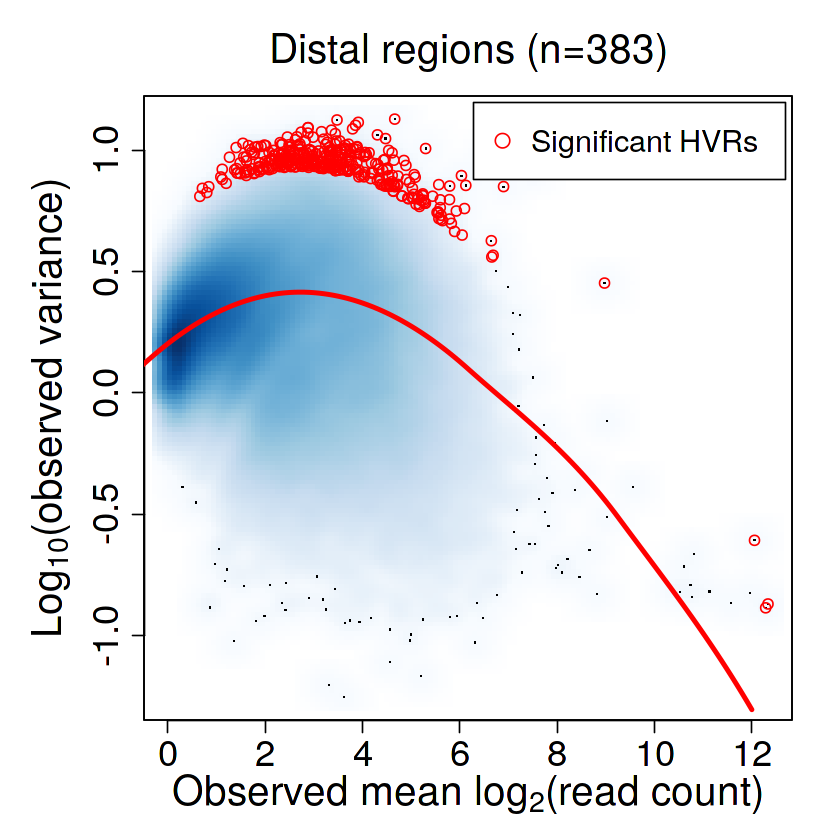

In [3]:
path<-'/media/chenhaojie/shao_lab_Disk01/Data_sets/mammalian_preimplantation_embryos/counts/combined_technical_replicates/distal_peak_regions_5000bp.txt'
reads_count<-c(4:14)
occupancy<-c(15:25)


raw_reads_count<-read.table(path,header=T,sep='\t')
raw_reads_count<-raw_reads_count[c(raw_reads_count$chrom!='chrX')&c(raw_reads_count$chrom!='chrY'),]

normalized.data<-MAnorm2::normalize(raw_reads_count,reads_count,occupancy,offset=0.5,
                                    baseline='pseudo-reference')

raw_reads_count<-raw_reads_count[rowMeans(normalized.data[reads_count])>=0,]
normalized.data<-normalized.data[rowMeans(normalized.data[reads_count])>=0,]

biocond<-bioCond(normalized.data[reads_count],
                 normalized.data[occupancy],
                 occupy.num=1,name='Tumor')

biocond$occupancy<-c(biocond$sample.mean<quantile(biocond$sample.mean,0.1))

conds.list<-list(biocond)

method<-'loc'
conds.list.fit<-fitMeanVarCurve(conds.list,method=method,occupy.only=F,args.lp=list(nn=1.0))


conds.list.fit<-estimatePriorDfRobust(conds.list.fit,occupy.only=T)
conds.fit.var<-varTestBioCond(conds.list.fit[[1]])
p.values<-single.end.pvalue(conds.fit.var)

fdrs<-p.adjust(p.values,method='fdr')

fdrs2<-p.adjust(1-p.values,method='fdr')


distal.result<-cbind(normalized.data,conds.fit.var,p.values,fdrs,fdrs2)


print(sum(fdrs<0.1))


par(mar=c(5,6,4,2),cex.main=1,font.main=1)
smoothScatter(conds.list.fit[[1]]$sample.mean,log10(conds.list.fit[[1]]$sample.var),
              xlab=expression(paste('Observed mean ',log[2],'(read count)')),
              ylab=expression(paste(Log[10],'(observed variance)')),
              main=gettextf('Distal regions (n=%d)',sum(fdrs<0.1)),cex.main=2,cex.lab=2,cex.axis=1.8)
lines(seq(-2,12,0.1),log10(conds.list.fit[[1]]$fit.info$predict(seq(-2,12,0.1))),lwd=3,col='red')
flag<-distal.result$fdrs<0.1
points(conds.list.fit[[1]]$sample.mean[flag],log10(conds.list.fit[[1]]$sample.var)[flag],col='red')

legend('topright',c('Significant HVRs'),
       inset=0.01,
       pch=21,
       col=c('red'),cex=1.5)


During the local regression procedure:
After iteration 1: 0 (0.00%) outlier(s) detected
Converged.

[1] 303


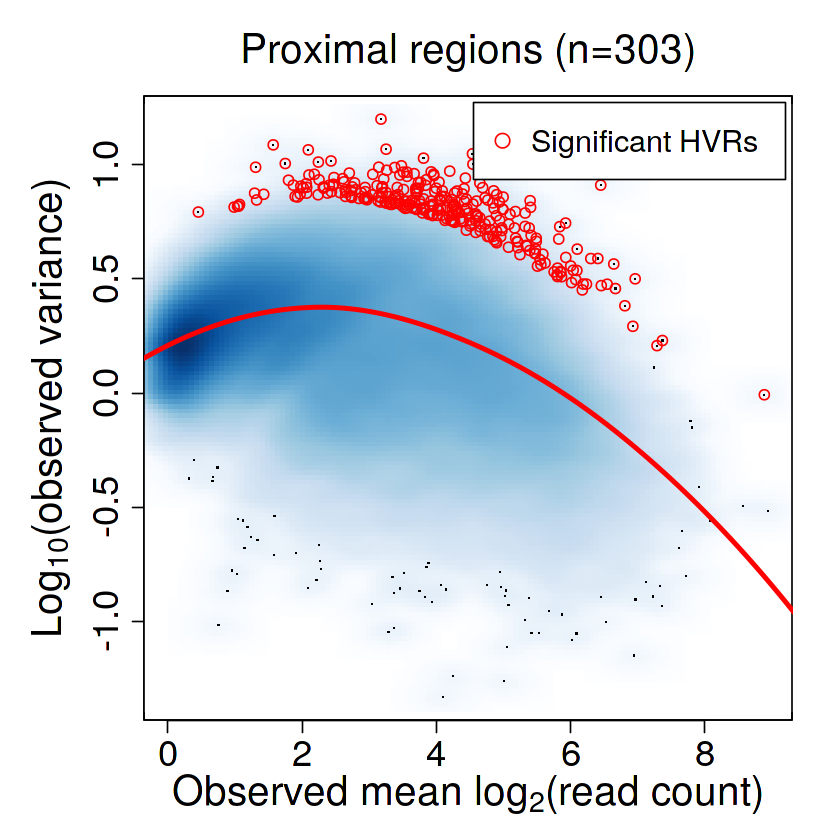

In [6]:
path<-'/media/chenhaojie/shao_lab_Disk01/Data_sets/mammalian_preimplantation_embryos/counts/combined_technical_replicates/proximal_peak_regions_5000bp.txt'
reads_count<-c(4:14)
occupancy<-c(15:25)


raw_reads_count<-read.table(path,header=T,sep='\t')
raw_reads_count<-raw_reads_count[c(raw_reads_count$chrom!='chrX')&c(raw_reads_count$chrom!='chrY'),]

normalized.data<-MAnorm2::normalize(raw_reads_count,reads_count,occupancy,offset=0.5,
                                    baseline='pseudo-reference')

raw_reads_count<-raw_reads_count[rowMeans(normalized.data[reads_count])>=0,]
normalized.data<-normalized.data[rowMeans(normalized.data[reads_count])>=0,]

biocond<-bioCond(normalized.data[reads_count],
                 normalized.data[occupancy],
                 occupy.num=1,name='Tumor')

biocond$occupancy<-c(biocond$sample.mean<quantile(biocond$sample.mean,0.1))

conds.list<-list(biocond)

method<-'loc'
conds.list.fit<-fitMeanVarCurve(conds.list,method=method,occupy.only=F,args.lp=list(nn=1.0))


conds.list.fit<-estimatePriorDfRobust(conds.list.fit,occupy.only=T)
conds.fit.var<-varTestBioCond(conds.list.fit[[1]])
p.values<-single.end.pvalue(conds.fit.var)

fdrs<-p.adjust(p.values,method='fdr')

fdrs2<-p.adjust(1-p.values,method='fdr')


proximal.result<-cbind(normalized.data,conds.fit.var,p.values,fdrs,fdrs2)


print(sum(fdrs<0.1))


par(mar=c(5,6,4,2),cex.main=1,font.main=1)
smoothScatter(conds.list.fit[[1]]$sample.mean,log10(conds.list.fit[[1]]$sample.var),
              xlab=expression(paste('Observed mean ',log[2],'(read count)')),
              ylab=expression(paste(Log[10],'(observed variance)')),
              main=gettextf('Proximal regions (n=%d)',sum(fdrs<0.1)),cex.main=2,cex.lab=2,cex.axis=1.8)
lines(seq(-2,12,0.1),log10(conds.list.fit[[1]]$fit.info$predict(seq(-2,12,0.1))),lwd=3,col='red')
flag<-proximal.result$fdrs<0.1
points(conds.list.fit[[1]]$sample.mean[flag],log10(conds.list.fit[[1]]$sample.var)[flag],col='red')

legend('topright',c('Significant HVRs'),
       inset=0.01,
       pch=21,
       col=c('red'),cex=1.5)


In [13]:
library(Rtsne)
library(pcaMethods)
library(extrafont)
library(mclust)
library(scales)

proximal.zscore.matrix<-scale(t(proximal.result[,reads_count]))
distal.zscore.matrix<-scale(t(distal.result[,reads_count]))

zscore.matrix<-scale(t(rbind(proximal.result[proximal.result$fdrs<0.1,reads_count],
                             distal.result[distal.result$fdrs<0.1,reads_count])))
pcs<-pca(zscore.matrix,
         nPcs=2)

pcs
pcs

svd calculated PCA
Importance of component(s):
                 PC1    PC2
R2            0.7164 0.1134
Cumulative R2 0.7164 0.8298
686 	Variables
11 	Samples
0 	NAs ( 0 %)
2 	Calculated component(s)
Data was mean centered before running PCA 
Data was NOT scaled before running PCA 
Scores structure:
[1] 11  2
Loadings structure:
[1] 686   2

svd calculated PCA
Importance of component(s):
                 PC1    PC2
R2            0.7164 0.1134
Cumulative R2 0.7164 0.8298
686 	Variables
11 	Samples
0 	NAs ( 0 %)
2 	Calculated component(s)
Data was mean centered before running PCA 
Data was NOT scaled before running PCA 
Scores structure:
[1] 11  2
Loadings structure:
[1] 686   2

In [14]:
color.list<-hue_pal()(5)

color.map<-c(color.list[1],color.list[1],
             color.list[2],color.list[2],
             color.list[3],color.list[3],
             color.list[4],color.list[4],
             color.list[5],color.list[5],color.list[5])

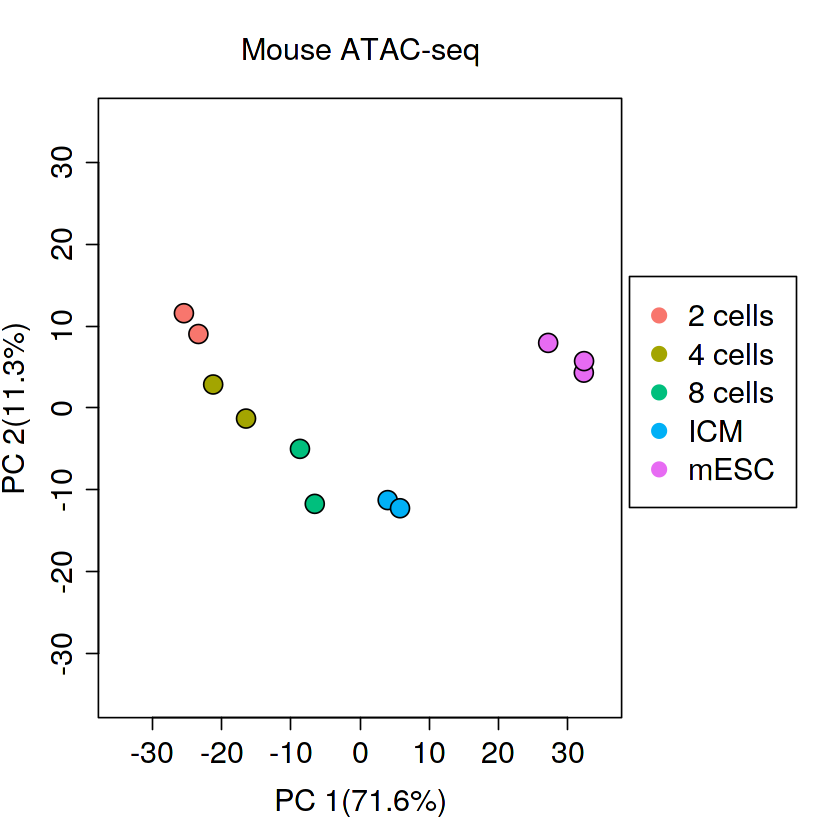

In [15]:
par(xpd=T,mar=par()$mar+c(0,0,0,7),cex.main=1,font.main=1)

plot(scores(pcs)[,'PC1'],scores(pcs)[,'PC2'],
     bg=color.map,col='black',pch=21,
     xlab=gettextf('PC 1(%.1f%%)',71.6),ylab=gettextf('PC 2(%.1f%%)',11.3),
     xlim=c(-35,35),ylim=c(-35,35),
     main='Mouse ATAC-seq',
     cex.lab=1.5,cex=2,cex.axis=1.5,cex.main=1.5)


color.map.df<-data.frame(cancer.type=c('2 cells','4 cells','8 cells','ICM','mESC'),
                               color=color.list)

legend(39,16,as.character(color.map.df$cancer.type),
       inset=0.0025,
       pch=c(19),
       cex=1.5,
       col=as.character(color.map.df$color),ncol=1,
       xpd=T)